<a href="https://colab.research.google.com/github/Funatlearn/langgraph101/blob/main/3_sequential_Agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Second agent, to handle multiple inputs
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 13.2 MB/s eta 0:00:00


In [9]:

from typing import TypedDict, List # use list, typeddict for state
from langgraph.graph import StateGraph # graph
import math

In [16]:
# This is State, shared data structure that keeps track of information as application runs.
class State(TypedDict):
  values: List[int]
  name: str
  operation: str
  result: str

def process_values(state: State) -> State:
  """ Handles multiple different inputs"""


  if state['operation'] == '+': val = sum(state['values'])
  if state['operation'] == '*': val = math.prod(state['values'])


  state['result'] = f"Hello there {state['name']}!, Your aggregate {state['operation']} is {val}"

  return state

In [17]:
graph = StateGraph(State)

graph.add_node("processor", process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")

app = graph.compile()

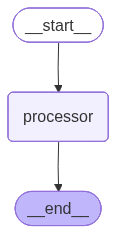

In [12]:
# display graph
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
# Invoke graph
result = app.invoke({"name": "Bob", "values":[2,3,4,5], "operation": "+"})
print(result['result'])

result = app.invoke({"name": "Alice", "values":[2,3,4,5], "operation": "*"})
print(result['result'])

Hello there Bob!, Your aggregate + is 14
Hello there Alice!, Your aggregate * is 120
